<h1> Dropout Excercise </h1>
In the following exercise, you will have a chance to try out different dropout rates (p), and will be able to check which had the greatest effect on the model, in terms of performance.

In [6]:
# Imports
import tensorflow as tf
from tensorflow import keras

In [7]:
# Meet fashion MNIST - you will get familiar with this dataset soon...
(train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train_images = train_images /  255.0
test_images = test_images / 255.0

splitter_train_val = 5000

train_images = train_images[splitter_train_val:]
train_labels = train_labels[splitter_train_val:]
validation_images = train_images[:splitter_train_val]
validation_labels = train_labels[:splitter_train_val]

In [8]:
# Another cool way to define networks is using Classes
# this makes the process pretty much automatic, and not dependent on some static values
### TODO: See the dropout rate below (0.2). 
# 1.Make sure to inject it as a parameter, so when we instantiate a model,
# we will be able to define its droput rate accordingly.
# 2. write a for loop of 3 models (no need for more),
# 2.1 each one of the models should be running on the same optimizers and compile as below
# 2.2 each one of the models should be running on the same optimizers and compile as below
# 3. Once the for loop ended, make sure to plot graphs of training performance + test performance.
# For that, you can use one of the old ex. we had.
# Dropout values can be randomly picked (ranging between 0 - 1)
### In other words, what I'm asking is a Hyperparameter random search, so you can implement this with some
# python library you know.
class CustomModel(keras.Model):
    def __init__(self, dropout_rate, **kwargs):
        super().__init__(**kwargs)
        self.input_layer = keras.layers.Flatten(input_shape=(28,28))
        self.hidden1 = keras.layers.Dense(200, activation='relu')
        self.hidden2 = keras.layers.Dense(100, activation='relu')
        self.hidden3 = keras.layers.Dense(60, activation='relu')
        self.output_layer = keras.layers.Dense(10, activation='softmax')
        self.dropout_layer = keras.layers.Dropout(rate=dropout_rate)
    
    def call(self, input, training=None):
        input_layer = self.input_layer(input)
        input_layer = self.dropout_layer(input_layer)
        hidden1 = self.hidden1(input_layer)
        hidden1 = self.dropout_layer(hidden1, training=training)
        hidden2 = self.hidden2(hidden1)
        hidden2 = self.dropout_layer(hidden2, training=training)
        hidden3 = self.hidden3(hidden2)
        hidden3 = self.dropout_layer(hidden3, training=training)
        output_layer = self.output_layer(hidden3)
        return output_layer

Epoch 1/5


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1719/1719 [==============================] - 12s 7ms/step - loss: 0.9232 - accuracy: 0.6768 - val_loss: 0.5602 - val_accuracy: 0.8002
Epoch 2/5
1719/1719 [==============================] - 9s 6ms/step - loss: 0.5911 - accuracy: 0.7920 - val_loss: 0.4925 - val_accuracy: 0.8144
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5275 - accuracy: 0.8124 - val_loss: 0.4392 - val_accuracy: 0.8402
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4868 - accuracy: 0.8272 - val_loss: 0.4096 - val_accuracy: 0.8496
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4654 - accuracy: 0.8324 - val_loss: 0.3920 - val_accuracy: 0.8568


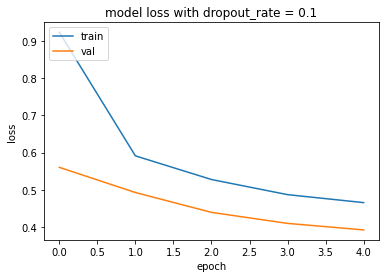

Epoch 1/5
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0984 - accuracy: 0.5976 - val_loss: 0.6440 - val_accuracy: 0.7462
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7029 - accuracy: 0.7440 - val_loss: 0.5432 - val_accuracy: 0.8022
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6161 - accuracy: 0.7768 - val_loss: 0.4962 - val_accuracy: 0.8124
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5731 - accuracy: 0.7943 - val_loss: 0.4638 - val_accuracy: 0.8286
Epoch 5/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5426 - accuracy: 0.8042 - val_loss: 0.4438 - val_accuracy: 0.8278


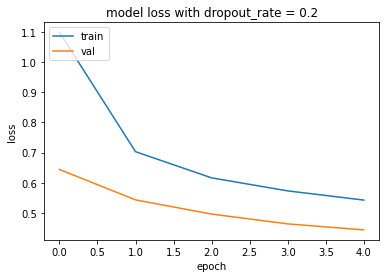

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 1.2882 - accuracy: 0.5155 - val_loss: 0.7370 - val_accuracy: 0.7226
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.8321 - accuracy: 0.6869 - val_loss: 0.6281 - val_accuracy: 0.7510
Epoch 3/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7358 - accuracy: 0.7241 - val_loss: 0.5802 - val_accuracy: 0.7720
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6853 - accuracy: 0.7452 - val_loss: 0.5487 - val_accuracy: 0.7810
Epoch 5/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6496 - accuracy: 0.7615 - val_loss: 0.5216 - val_accuracy: 0.7980


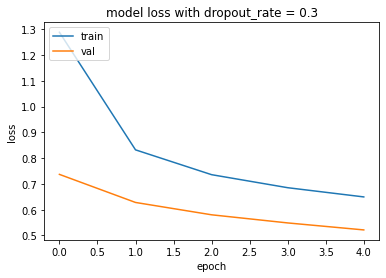

In [9]:
import matplotlib.pyplot as plt

# Note: epochs changed to 5 to make solution works faster, should work the same with 60
for dropout_value in [0.1, 0.2, 0.3]: # For example
    model = CustomModel(dropout_rate = dropout_value)
    sgd = keras.optimizers.SGD(lr=0.01)
    model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
    
    history = model.fit(train_images, train_labels, epochs=5, validation_data=(validation_images, validation_labels))

    # plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'model loss with dropout_rate = {dropout_value}')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [10]:
# evaluate - as we discussed in class
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.5298 - accuracy: 0.7948


[0.5298038721084595, 0.7947999835014343]